# Домашнее задание "Продвинутая линейная алгебра".

# Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [1]:
import numpy as np

In [ ]:
# a) Диагональная, ортогональная, но не единичная(!)

dig_ort_m = np.array([[-1, 0, 0],
                    [0, -1, 0],
                    [0, 0, -1]])
dig_ort_m

In [ ]:
# b) Верхнетреугольная, ортогональная

uptrian_ort_m = np.array([[1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1]])
uptrian_ort_m

In [ ]:
# c) Нижнетреугольная, ортогональная

downtrian_ort_m = np.array([[1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1]])
downtrian_ort_m

In [ ]:
# d) Матрица, у которой определитель = 1, и все элементы не равны 0

m_det_1 = np.array([[2, 1, 1],
                          [1, 3, 1],
                          [1, 2, 1]])


In [ ]:
m_1 = np.array([[0.96, -0.5],
              [0, 0.96]])
print(m_1)

In [ ]:
m_2 = m_1.T
print(m_2)

In [ ]:
np.dot(m_1, m_2)

In [ ]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

In [ ]:
np.linalg.eig(m)

# Уровень 1:¶
Найдите спектральное разложение матрицы:

In [ ]:
m = np.array([[1, 2],
              [2,3]])
print(m)

In [ ]:
v, w = np.linalg.eigh(m)
d = np.diag(v)
s = w.T

In [ ]:
np.dot(np.dot(s, d), w)

# 
Постройте зависимость качества восстановления рукописных цифр (MNIST) 
в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

In [ ]:
# У PCA есть метод transform и inverse_transofrm. 
# Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. 
# Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка 
# в зависимости от количества компонент в PCA.

In [2]:
from sklearn.datasets import load_digits

In [3]:
x, y = load_digits(return_X_y=True)

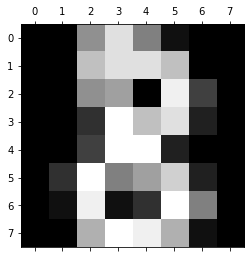

Количество компонент: 1, средняя квадратичная ошибка: 4.8056006209081605
Количество компонент: 2, средняя квадратичная ошибка: 2.591818735298764
Количество компонент: 3, средняя квадратичная ошибка: 0.6288226464702851
Количество компонент: 4, средняя квадратичная ошибка: 0.09795097376040796
Количество компонент: 5, средняя квадратичная ошибка: 0.018366170215265796
Количество компонент: 6, средняя квадратичная ошибка: 6.72053254093926e-30
Количество компонент: 7, средняя квадратичная ошибка: 6.72053254093926e-30


In [14]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

x, y = load_digits(return_X_y=True)

image = x[8]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show() 

components = []
mse = []

for i in range(1, 8):
    pca = PCA(n_components=i)
    pca.fit(image)
    image_trans = pca.transform(image)
    y_true = image
    y_pred = pca.inverse_transform(image_trans)
    mse_ = mean_squared_error(y_true, y_pred)
    print(f'Количество компонент: {i}, средняя квадратичная ошибка: {mse_}')
    components.append(i)
    mse.append(mse_)
    
    

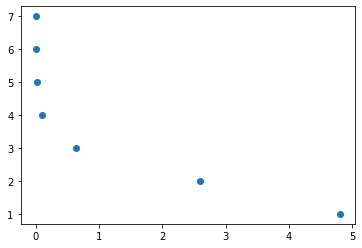

In [16]:
# График изменения MSE в зависимости от количества главных компонент
plt.scatter(mse, components)